## Title: Predicting Customer Churn - A Machine Learning Approach

Description: Customer attrition, also known as customer churn, is a critical challenge faced by businesses. The goal of this project is to develop a predictive model that can identify customers who are likely to churn, allowing the organization to implement targeted retention strategies and reduce customer churn rate. By understanding the key factors that influence customer churn, we aim to provide valuable insights that will help the company make informed decisions to improve customer retention and loyalty

In [61]:
#install required packages
%pip install pyodbc  
%pip install python-dotenv
%pip install pandas
%pip install sklearn
%pip install openpyxl
%pip install imblearn


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import all necessary packages

In [62]:

import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


import openpyxl
import warnings 

warnings.filterwarnings('ignore')

### Data Loading
First Data Set

In [63]:
# Load environment variables from .env file into a dictionary
environment_variables=dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database=environment_variables.get("DATABASE")
server=environment_variables.get("SERVER")
username=environment_variables.get("USERNAME")
password=environment_variables.get("PASSWORD")

connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [64]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection=pyodbc.connect(connection_string)

In [65]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

query="Select * from dbo.LP2_Telco_churn_first_3000"
data=pd.read_sql(query,connection)

In [66]:
#inspect the first five rows of the first data set
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


### Second Data Set

In [67]:
#Load the second dataframe and inspect the first five rows
data2=pd.read_csv('LP2_Telco-churn-last-2000.csv')
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


### Third Data Set

In [68]:
data3 = pd.read_excel("Telco-churn-second-2000.xlsx")
data3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [69]:
# You can concatenate this with other DataFrames to get one data set for your work
# !!!Concatenation done for data data2 and data3
df = pd.concat([data,data2,data3])
df.to_csv('aba.csv')

## Exploratory Data Analysis

In the exploratory data analysis phase, we will perform univariate, bivariate, and multivariate analysis to gain insights into the data. Visualizations such as bar charts, histograms, scatter plots, and correlation matrices will be used to understand the distribution of variables, relationships between features, and their impact on customer churn.

In [70]:
data.shape

(3000, 21)

In [71]:
data2.shape

(2043, 21)

In [72]:
data3.shape

(2000, 20)

In [73]:
df.shape

(7043, 21)

In [74]:
#Check the shapes of the dataframes
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,False,False,False,False,False
Partner,True,False,False,False,False
Dependents,False,False,False,False,False
tenure,1,34,2,45,2
PhoneService,False,True,True,False,True
MultipleLines,None,False,False,None,False
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,False,True,True,True,False


## Hypothesis
Customers on month-to-month contracts are more likely to churn compared to those on one-year or two-year contracts.

**Questions:**

1. Is there a relationship between the type of internet service (DSL, Fiber Optic, No Internet) and customer churn?
2. Does the monthly charge amount impact customer churn rate? Are higher monthly charges associated with higher churn?
3. Do customers who have additional services like online security, tech support, etc., have lower churn rates?
4. Is there a correlation between the tenure (number of months a customer has stayed with the company) and the likelihood of churn? Do customers who have been with the company for a longer time exhibit lower churn rates?
5. How does the payment method influence customer churn? Are customers using automatic payment methods (Electronic check, Bank transfer(automatic), Credit card(automatic)) less likely to churn compared to those using manual methods (mailed check)?

## Potential Data Issues with attempted solutions

1. Missing Values: We will check for missing values in the dataset and decide how to handle them. If there are only a few missing values, we may choose to drop those rows. If a significant number of records have missing values, we can consider imputation techniques like mean, median, or mode.

2. Data Types: We will ensure that the data types of each column are appropriate for the analysis. Categorical variables should be encoded as numeric values, and continuous variables should remain as numeric.

3. Class Imbalance: We need to check for class imbalance in the target variable (Churn). If there is a severe class imbalance, we may need to address it using techniques such as oversampling, undersampling, or using appropriate evaluation metrics.

4. Feature Scaling: Some machine learning algorithms may require feature scaling to ensure that all features contribute equally to the model. We will scale the numerical features if necessary.

5. Handling Categorical Variables: We will use one-hot encoding to convert categorical variables into a binary form suitable for model training.

6. Data Splitting: Before model training, we will split the data into training and testing sets to evaluate the model's performance on unseen data.

By addressing these issues during data preprocessing, we can ensure that our dataset is ready for model building and analysis.



### Important terminologies:
Classifier: An algorithim that is used to map the input data to a specific category.

Classification model: The model that predicts the input data given for training.

Feature: It is an individual measurable property of the phenomenon being observed.

Labels: The characteristics on which the datapoints of a dataset  are categorized. 

In [75]:
# We start with Data Types
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [76]:
# We expect Total Charges column be numeric, as it contains the total amount of money the client was charged/ 
# so it should not be an object.
total_charges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [77]:
# Currently, the 'Churn' column is categorical, with two values, “yes” and “no”. For binary classification, \n 
# all models typically expect a number: 0 for “no” and 1 for “yes.” Let’s convert it to numbers.

df.Churn = (df.Churn == 'yes').astype(int)

In [78]:
# Missing Values
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 0
dtype: int64

In [79]:
df['Churn'].dtype

dtype('int32')

In [80]:
#Let's start filling in missing values.
# From the above TotalCharges column contains missing values of 5. We fill missing values with 0.
df.TotalCharges = df.TotalCharges.fillna(0)

In [81]:
# Missing Values
df.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
dtype: int64

In [82]:
#Filling missing values
#calculate mode
mode_category = df['MultipleLines'].mode()[0]
mode_category = df['OnlineSecurity'].mode()[0]
mode_category = df['OnlineBackup'].mode()[0]
mode_category = df['DeviceProtection'].mode()[0]
mode_category = df['TechSupport'].mode()[0]
mode_category = df['StreamingTV'].mode()[0]
mode_category = df['StreamingMovies'].mode()[0]


In [83]:
#Fill in missing values with the mode
df['MultipleLines'].fillna(mode_category, inplace=True)
df['OnlineSecurity'].fillna(mode_category, inplace=True)
df['OnlineBackup'].fillna(mode_category, inplace=True)
df['DeviceProtection'].fillna(mode_category, inplace=True)
df['TechSupport'].fillna(mode_category, inplace=True)
df['StreamingTV'].fillna(mode_category, inplace=True)
df['StreamingMovies'].fillna(mode_category, inplace=True)

In [84]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [85]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

In [86]:
numeric_df.corr()

,tenure,MonthlyCharges
tenure,1.0000,0.2479
MonthlyCharges,0.2479,1.0000


In [87]:
df.shape

(7043, 21)

In [88]:
df.describe

<bound method NDFrame.describe of       customerID  gender SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female         False    True      False       1   
1     5575-GNVDE    Male         False   False      False      34   
2     3668-QPYBK    Male         False   False      False       2   
3     7795-CFOCW    Male         False   False      False      45   
4     9237-HQITU  Female         False   False      False       2   
...          ...     ...           ...     ...        ...     ...   
1995  7912-SYRQT  Female             0      No         No       7   
1996  3557-HTYWR  Female             0      No         No      47   
1997  4816-JBHOV    Male             1      No         No       2   
1998  8920-NAVAY    Male             1      No         No      62   
1999  1699-TLDLZ  Female             0     Yes        Yes      16   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
0           False            No             DSL             

In [89]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int32
dtype: object

In [90]:
df = pd.DataFrame(data)

# Feature Engineering Steps

# Convert SeniorCitizen to binary numeric (0 or 1)
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert categorical columns to numerical using Label Encoding
label_encoder = LabelEncoder()
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Convert TotalCharges to numeric (handling missing values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)  # Replace missing values with 0

# Perform any other feature engineering steps as needed
# For example, you could create new features by combining or transforming existing columns.

# Now you have an engineered DataFrame
print(df)

              customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0             7590-VHVEG       0              0        1           0       1   
1             5575-GNVDE       1              0        0           0      34   
2             3668-QPYBK       1              0        0           0       2   
3             7795-CFOCW       1              0        0           0      45   
4             9237-HQITU       0              0        0           0       2   
...                  ...     ...            ...      ...         ...     ...   
2995          2209-XADXF       0              0        0           0       1   
2996          6620-JDYNW       0              0        0           0      18   
2997          1891-FZYSA       1              0        1           0      69   
2998          4770-UEZOX       1              0        0           0       2   
2999  1A1:U3001038-RQOST       1              0        1           1      19   

      PhoneService  MultipleLines  Inte

In [91]:
column_to_drop = 'customerID'
df1 = df.drop(columns=[column_to_drop])


print(df1)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
2995       0              0        0           0       1             0   
2996       0              0        0           0      18             1   
2997       1              0        1           0      69             1   
2998       1              0        0           0       2             1   
2999       1              0        1           1      19             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 2                0     

In [92]:
df1.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,NaN,-0.006713,0.015183,0.002017,-0.005094,0.002484,-0.006473,-0.004440,0.014335,0.007262,-0.001110,0.006251,0.011151,-0.008299,-0.010725,0.036526,-0.027542,-0.003958,-0.005312
SeniorCitizen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,-0.006713,NaN,1.000000,0.476960,0.383231,0.014221,0.090049,-0.001815,0.084634,0.077897,0.079307,0.059536,0.071432,0.069776,0.273027,0.006101,-0.157929,0.091626,0.325048,-0.142927
Dependents,0.015183,NaN,0.476960,1.000000,0.183903,-0.014152,-0.005491,0.043271,0.189563,0.147416,0.146627,0.168218,0.149433,0.132089,0.242163,-0.109342,-0.044876,-0.100752,0.093534,-0.172355
tenure,0.002017,NaN,0.383231,0.183903,1.000000,0.014154,0.245667,-0.021482,0.161099,0.196092,0.191111,0.155865,0.143202,0.144233,0.677037,0.006070,-0.390785,0.230240,0.824598,-0.349110
PhoneService,-0.005094,NaN,0.014221,-0.014152,0.014154,1.000000,-0.675163,0.377134,0.115560,0.137759,0.146014,0.115850,0.170870,0.153028,-0.005901,0.012459,0.002566,0.240757,0.111578,0.013203
MultipleLines,0.002484,NaN,0.090049,-0.005491,0.245667,-0.675163,1.000000,-0.323040,-0.221734,-0.189071,-0.204837,-0.214796,-0.193496,-0.180932,0.085680,0.111801,-0.142487,0.153791,0.262667,0.019749
InternetService,-0.006473,NaN,-0.001815,0.043271,-0.021482,0.377134,-0.323040,1.000000,0.602756,0.658685,0.663384,0.609884,0.710954,0.697576,0.099491,-0.147757,0.073926,-0.334212,-0.182202,-0.041090
OnlineSecurity,-0.004440,NaN,0.084634,0.189563,0.161099,0.115560,-0.221734,0.602756,1.000000,0.751521,0.750876,0.791116,0.705922,0.709078,0.395153,-0.323274,0.055217,-0.626148,-0.149945,-0.346477
OnlineBackup,0.014335,NaN,0.077897,0.147416,0.196092,0.137759,-0.189071,0.658685,0.751521,1.000000,0.739462,0.749789,0.716273,0.706965,0.352837,-0.254102,0.030627,-0.550300,-0.080979,-0.305255


In [93]:
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               1
dtype: int64

In [94]:
# Round and convert to integer for specific columns
columns_to_convert = ['MonthlyCharges', 'TotalCharges']

for column in columns_to_convert:
    df1[column] = df1[column].round().astype(int)

In [95]:
# Handling missing values by filling them with False (you can choose a suitable value)
df1['Churn'] = df1['Churn'].fillna(False)

# Convert 'Churn' column boolean values to integers
df1['Churn'] = df1['Churn'].astype(int)

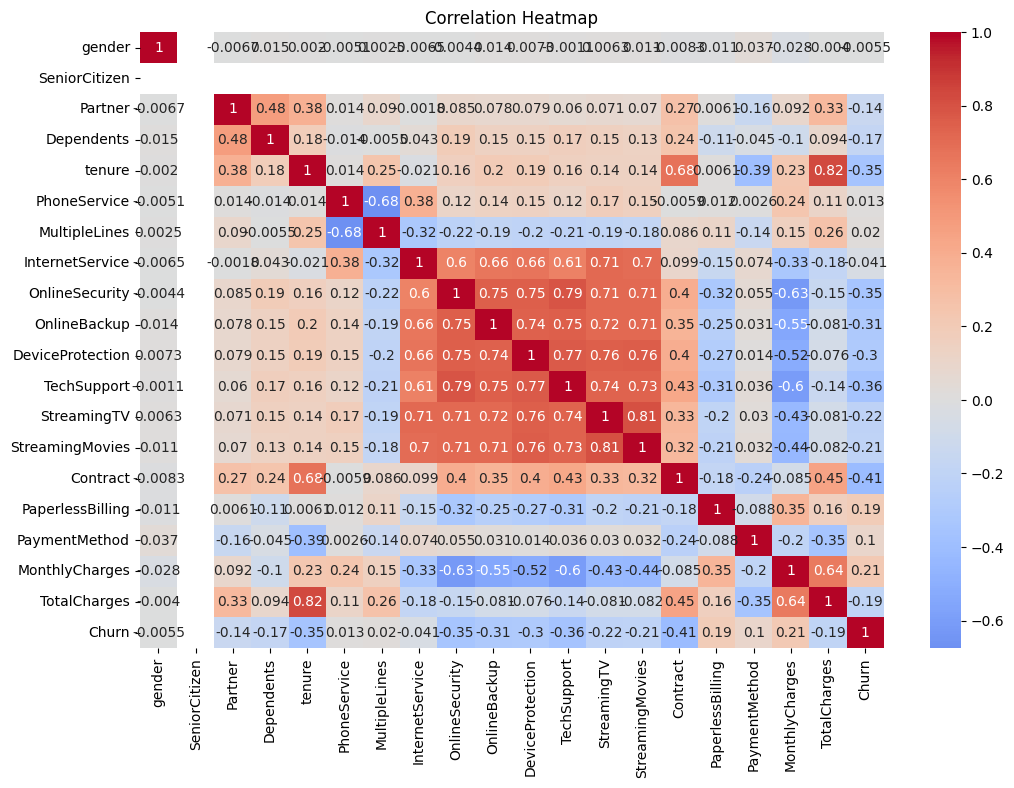

In [96]:
correlation_matrix = df1.corr()

# Set up the figure and axes for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Set the title of the plot
plt.title("Correlation Heatmap")

# Display the plot
plt.show()

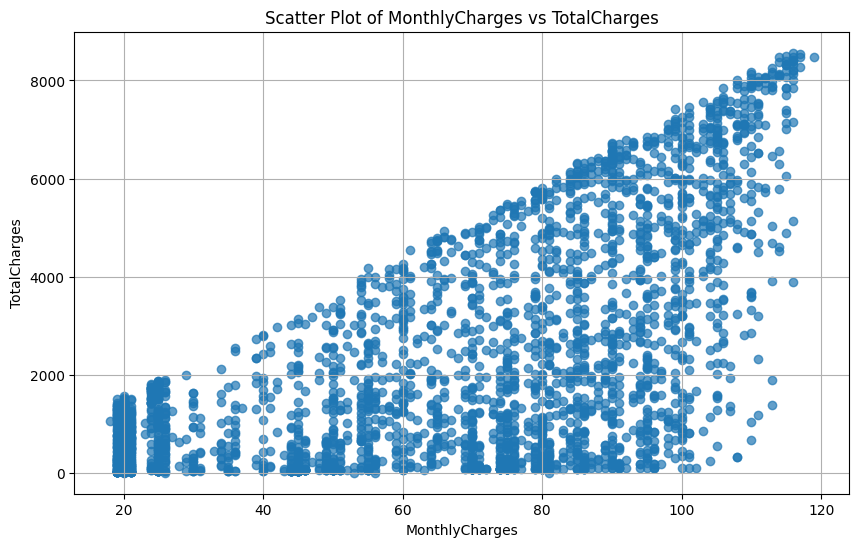

In [97]:
# Choose two continuous variables for the scatter plot
x_variable = 'MonthlyCharges'
y_variable = 'TotalCharges'

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df1[x_variable], df1[y_variable], alpha=0.7)
plt.title(f'Scatter Plot of {x_variable} vs {y_variable}')
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.grid(True)
plt.show()

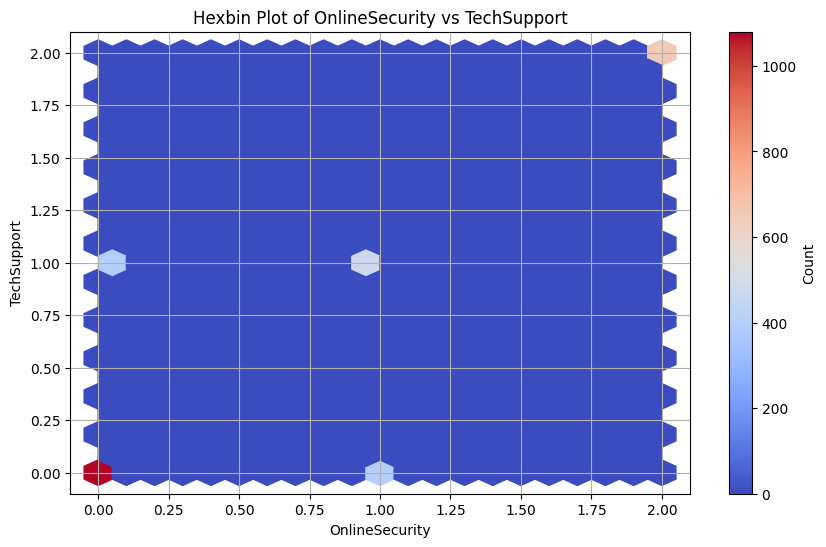

In [98]:
# Choose two continuous variables for the hexbin plot
x_variable = 'OnlineSecurity'
y_variable = 'TechSupport'

# Create a hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(df1[x_variable], df1[y_variable], gridsize=20, cmap='coolwarm')
plt.colorbar(label='Count')
plt.title(f'Hexbin Plot of {x_variable} vs {y_variable}')
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.grid(True)
plt.show()

In [99]:
# Separate features and target variable
X = df1.drop(columns=['Churn'])
y = df1['Churn']

In [100]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
#Data Fitting
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [102]:
# Perform feature scaling using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [103]:
# Build and train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train_resampled)
lr_predictions = lr_model.predict(X_test_scaled)

In [104]:
# Build and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train_resampled)
dt_predictions = dt_model.predict(X_test_scaled)

In [105]:
# Build and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_resampled)
rf_predictions = rf_model.predict(X_test_scaled)

In [106]:
# Evaluate models
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, target_names=['Not Churn', 'Churn'])
    print(f"{model_name} Model:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)

evaluate_model(lr_predictions, "Logistic Regression")
evaluate_model(dt_predictions, "Decision Tree")
evaluate_model(rf_predictions, "Random Forest")

Logistic Regression Model:
Accuracy: 0.7933333333333333
Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.90      0.81      0.86       454
       Churn       0.56      0.73      0.63       146

    accuracy                           0.79       600
   macro avg       0.73      0.77      0.74       600
weighted avg       0.82      0.79      0.80       600

Decision Tree Model:
Accuracy: 0.7466666666666667
Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.85      0.80      0.83       454
       Churn       0.48      0.57      0.52       146

    accuracy                           0.75       600
   macro avg       0.67      0.69      0.67       600
weighted avg       0.76      0.75      0.75       600

Random Forest Model:
Accuracy: 0.8033333333333333
Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.88      0.85      0.87       454
       Ch

In [107]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
def hyperparameter_tuning(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train_resampled)
    return grid_search.best_estimator_

# Hyperparameters to tune for each model
lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
dt_param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}

# Tune hyperparameters for each model
tuned_lr_model = hyperparameter_tuning(LogisticRegression(), lr_param_grid)
tuned_dt_model = hyperparameter_tuning(DecisionTreeClassifier(random_state=42), dt_param_grid)
tuned_rf_model = hyperparameter_tuning(RandomForestClassifier(random_state=42), rf_param_grid)

In [108]:
# Evaluate tuned models
def evaluate_tuned_model(model, model_name):
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, target_names=['Not Churn', 'Churn'])
    print(f"Tuned {model_name} Model:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)

evaluate_tuned_model(tuned_lr_model, "Logistic Regression")
evaluate_tuned_model(tuned_dt_model, "Decision Tree")
evaluate_tuned_model(tuned_rf_model, "Random Forest")

Tuned Logistic Regression Model:
Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.91      0.81      0.85       454
       Churn       0.55      0.74      0.63       146

    accuracy                           0.79       600
   macro avg       0.73      0.77      0.74       600
weighted avg       0.82      0.79      0.80       600

Tuned Decision Tree Model:
Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.87      0.77      0.82       454
       Churn       0.47      0.64      0.54       146

    accuracy                           0.74       600
   macro avg       0.67      0.71      0.68       600
weighted avg       0.77      0.74      0.75       600

Tuned Random Forest Model:
Accuracy: 0.8083333333333333
Classification Report:
               precision    recall  f1-score   support

   Not Churn       0.89      0.85      0.87       454
       Churn       

In [109]:
df1.dtypes

gender              int32
SeniorCitizen       int64
Partner             int64
Dependents          int64
tenure              int64
PhoneService        int64
MultipleLines       int32
InternetService     int32
OnlineSecurity      int32
OnlineBackup        int32
DeviceProtection    int32
TechSupport         int32
StreamingTV         int32
StreamingMovies     int32
Contract            int32
PaperlessBilling    int64
PaymentMethod       int32
MonthlyCharges      int32
TotalCharges        int32
Churn               int32
dtype: object